# Super TML
---
Pytorch Implementation [Super TML: Two-Dimensional Word Embedding for the Precognition on Structured Tabular Data](https://arxiv.org/abs/1903.06246) with iris data.
I was very interested in its core idea which is tabular data can be embedded to 2 dimension-matrix. I just wondered "IT IS WORK REALLY??" so let me check, let's code!
![image.png](./paper.png)

## Imports & Settings

In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from data_preparation import data_to_image
from model import model_res
from train import train_model

torch.backends.cudnn.enabled = False
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

%load_ext autoreload
%autoreload 2
%matplotlib inline
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format = 'retina'

## Data Preparation

(120, 3, 255, 255)
(30, 3, 255, 255)


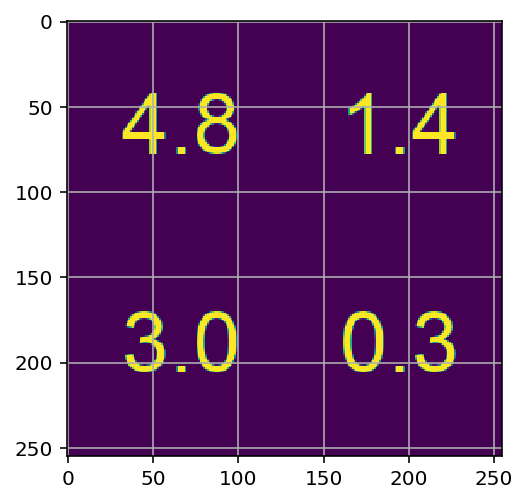

In [2]:
iris_data = load_iris()

X_train, X_val, y_train, y_val = train_test_split(iris_data.data, iris_data.target, stratify=iris_data.target, test_size=0.2, random_state=0)

train_images = data_to_image(X_train)
val_images = data_to_image(X_val)

print(train_images.shape)
print(val_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [3]:
X_train = torch.from_numpy(train_images).float()
y_train = torch.from_numpy(y_train).long()
X_val = torch.from_numpy(val_images).float()
y_val = torch.from_numpy(y_val).long()

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

dataloaders = {'train': DataLoader(train_dataset, batch_size=16, shuffle=True),
              'val': DataLoader(val_dataset)}

dataset_sizes = {'train': len(X_train),
                'val': len(X_val)}

## Modeling
- Transfer Learning from Resnet
- I changed just fully connect layer at the end to 3 outputs

In [4]:
model = model_res.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())


> Actually IT WORKS!!

In [5]:
best_model = train_model(model, dataloaders, dataset_sizes, criterion, optimizer, device, epochs=20)

EPOCH 1 / 20: 
----------
val Loss: 5.3997 Acc:  0.3333
EPOCH 2 / 20: 
----------
val Loss: 0.6481 Acc:  0.8333
EPOCH 3 / 20: 
----------
val Loss: 0.9328 Acc:  0.7667
EPOCH 4 / 20: 
----------
val Loss: 0.3546 Acc:  0.9333
EPOCH 5 / 20: 
----------
val Loss: 0.4566 Acc:  0.9333
EPOCH 6 / 20: 
----------
val Loss: 0.2912 Acc:  0.8667
EPOCH 7 / 20: 
----------
val Loss: 0.2331 Acc:  0.9333
EPOCH 8 / 20: 
----------
val Loss: 0.4565 Acc:  0.9333
EPOCH 9 / 20: 
----------
val Loss: 0.3249 Acc:  0.9667
EPOCH 10 / 20: 
----------
val Loss: 0.4116 Acc:  0.9000
EPOCH 11 / 20: 
----------
val Loss: 0.3704 Acc:  0.9333
EPOCH 12 / 20: 
----------
val Loss: 0.3225 Acc:  0.9333
EPOCH 13 / 20: 
----------
val Loss: 0.6221 Acc:  0.9333
EPOCH 14 / 20: 
----------
val Loss: 0.8669 Acc:  0.8667
EPOCH 15 / 20: 
----------
val Loss: 0.3086 Acc:  0.9333
EPOCH 16 / 20: 
----------
val Loss: 0.3501 Acc:  0.9333
EPOCH 17 / 20: 
----------
val Loss: 0.1983 Acc:  0.9333
EPOCH 18 / 20: 
----------
val Loss: 0.1

## Further Experiments
One of my study group members was curious if the performance could be affected by the columns' positions. Let's check! I will change its position like below left to right and the other conditions are all same.

![compare.png](./compare.png)

result: Their Location doesn't matter with model performance

(120, 3, 255, 255)
(30, 3, 255, 255)


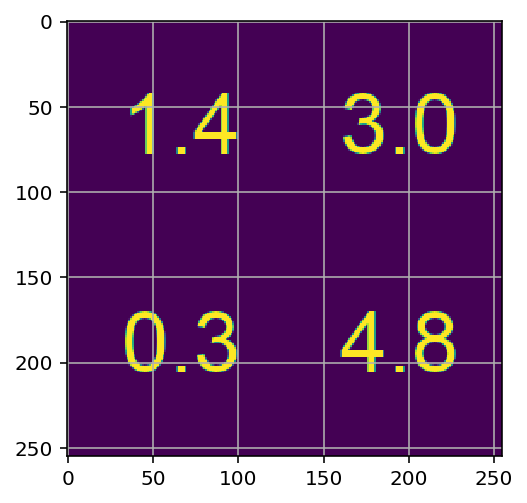

In [6]:
from data_preparation import data_to_image_another

iris_data = load_iris()

X_train, X_val, y_train, y_val = train_test_split(iris_data.data, iris_data.target, stratify=iris_data.target, test_size=0.2, random_state=0)

train_images = data_to_image_another(X_train)
val_images = data_to_image_another(X_val)

print(train_images.shape)
print(val_images.shape)
plt.grid()
plt.imshow(train_images[0][0, :, :])

In [7]:
X_train = torch.from_numpy(train_images).float()
y_train = torch.from_numpy(y_train).long()
X_val = torch.from_numpy(val_images).float()
y_val = torch.from_numpy(y_val).long()

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)

dataloaders = {'train': DataLoader(train_dataset, batch_size=16, shuffle=True),
              'val': DataLoader(val_dataset)}

dataset_sizes = {'train': len(X_train),
                'val': len(X_val)}

model_another = model_res.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_another.parameters())

best_model = train_model(model_another, dataloaders, dataset_sizes, criterion, optimizer, device, epochs=20)

EPOCH 1 / 20: 
----------
val Loss: 4.3803 Acc:  0.6667
EPOCH 2 / 20: 
----------
val Loss: 49.4471 Acc:  0.3333
EPOCH 3 / 20: 
----------
val Loss: 1.4664 Acc:  0.7000
EPOCH 4 / 20: 
----------
val Loss: 0.7917 Acc:  0.8667
EPOCH 5 / 20: 
----------
val Loss: 1.6323 Acc:  0.8333
EPOCH 6 / 20: 
----------
val Loss: 1.8395 Acc:  0.6667
EPOCH 7 / 20: 
----------
val Loss: 0.4488 Acc:  0.9333
EPOCH 8 / 20: 
----------
val Loss: 0.2794 Acc:  0.9333
EPOCH 9 / 20: 
----------
val Loss: 0.1849 Acc:  0.9667
EPOCH 10 / 20: 
----------
val Loss: 0.1331 Acc:  0.9667
EPOCH 11 / 20: 
----------
val Loss: 0.1345 Acc:  0.9667
EPOCH 12 / 20: 
----------
val Loss: 0.3936 Acc:  0.9333
EPOCH 13 / 20: 
----------
val Loss: 0.1830 Acc:  0.9333
EPOCH 14 / 20: 
----------
val Loss: 0.1597 Acc:  0.9667
EPOCH 15 / 20: 
----------
val Loss: 0.1071 Acc:  0.9667
EPOCH 16 / 20: 
----------
val Loss: 0.3240 Acc:  0.8667
EPOCH 17 / 20: 
----------
val Loss: 0.2489 Acc:  0.9333
EPOCH 18 / 20: 
----------
val Loss: 0.

---
I just coded for fun and curiosity, but this simple implementation gives very new insights of relation between tabular data and embeddings.